In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,recall_score
from sklearn.svm import SVC

In [3]:
df = pd.read_excel('Preprocessed.xlsx')

In [4]:
df.head()

,T,MO,CT,NI,PB,ET,HF,TA,BS,Degree of Injury
0,1,8,0,1,10,2,14,1,0,0
1,1,7,8,9,10,2,10,1,1,0
2,1,6,0,5,12,14,4,2,0,0
3,0,6,3,21,13,5,14,1,1,1
4,0,6,0,3,20,1,15,1,0,0


In [5]:
from sklearn.model_selection import train_test_split

X = df[['T','MO','CT','NI','PB','ET','HF','TA','BS']]
y = df['Degree of Injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (4847, 9)
Shape of X after SMOTE: (5928, 9)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Degree of Injury, dtype: float64

Accuracy = 0.88
Recall = 0.90

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       737
           1       0.86      0.90      0.88       745

    accuracy                           0.88      1482
   macro avg       0.88      0.88      0.88      1482
weighted avg       0.88      0.88      0.88      1482



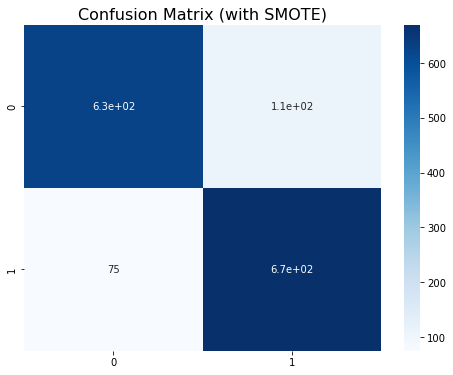

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42)

model = SVC(kernel='rbf', C=1, gamma= 'auto')
model.fit(X_train, y_train)
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
print(classification_report(y_test,preds))

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid_nb = {'C': [ 1,2,3,4,5,7,8],
              'gamma': [0.10,0.01,0.09,0.095,0.08,'auto'],
              'kernel': ['rbf','linear']} # C&gamma(larger than slowly integrate)

nbModel_grid = GridSearchCV(estimator=SVC(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_) 

Fitting 10 folds for each of 84 candidates, totalling 840 fits


KeyboardInterrupt: 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       737
           1       0.88      0.89      0.88       745

    accuracy                           0.88      1482
   macro avg       0.88      0.88      0.88      1482
weighted avg       0.88      0.88      0.88      1482



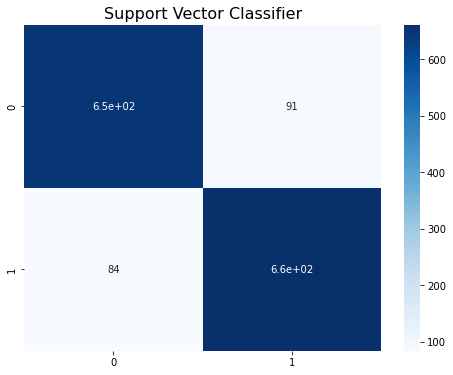

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42)

model = SVC(kernel='rbf', C=3, gamma= 0.08)
model.fit(X_train, y_train)
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Support Vector Classifier', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
print(classification_report(y_test,preds))

Text(0.5, 0, 'Permutation Importance')

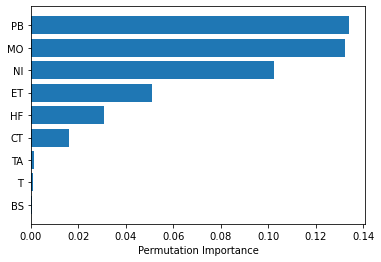

In [9]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svc =  SVC(kernel='rbf', C=3, gamma= 0.08)
svc.fit(X_train, y_train)

perm_importance = permutation_importance(svc, X_test, y_test)

feature_names = ['T','MO','CT','NI','PB','ET','HF','TA','BS' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

[0.00418354 0.16720648 0.04664867 0.15362123 0.20958165 0.09050832
 0.08605488 0.00557805 0.01300045]


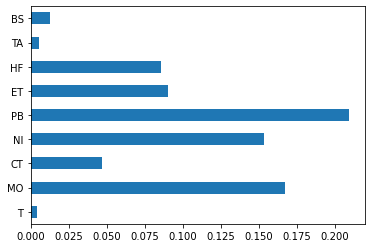

In [10]:
imps = permutation_importance(svc, X_train, y_train)
print(imps.importances_mean)
attr = imps.importances_mean
feat_importances = pd.Series(attr, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

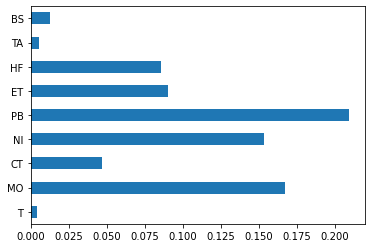

In [11]:
attr = imps.importances_mean
feat_importances = pd.Series(attr, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = df[['MO','CT','NI','PB','ET','HF',]]
y = df['Degree of Injury']


In [13]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (4847, 6)
Shape of X after SMOTE: (5928, 6)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Degree of Injury, dtype: float64

Accuracy = 0.87
Recall = 0.91

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       737
           1       0.85      0.91      0.88       745

    accuracy                           0.87      1482
   macro avg       0.87      0.87      0.87      1482
weighted avg       0.87      0.87      0.87      1482



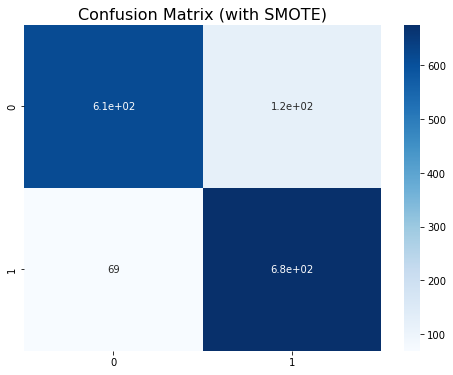

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42)

model = SVC(kernel='rbf', C=1, gamma= 'auto')
model.fit(X_train, y_train)
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
print(classification_report(y_test,preds))

In [11]:
from sklearn.model_selection import train_test_split

X = df[['MO','CT','NI','PB','ET','HF']]
y = df['Degree of Injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       737
           1       0.87      0.89      0.88       745

    accuracy                           0.88      1482
   macro avg       0.88      0.88      0.88      1482
weighted avg       0.88      0.88      0.88      1482



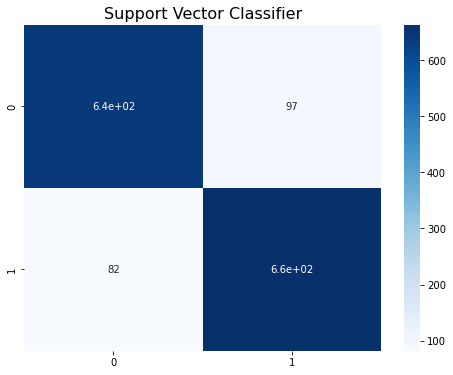

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42)

model = SVC(kernel='rbf', C=3, gamma= 0.08)
model.fit(X_train, y_train)
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Support Vector Classifier', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
print(classification_report(y_test,preds))

In [14]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (4847, 6)
Shape of X after SMOTE: (5928, 6)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Degree of Injury, dtype: float64